1번 : 강의자료 예제 구현

- 뿌리node에서의 gain값을 구하는 프로세스까지만 numpy 함수로 구현

In [57]:
import numpy as np

# [기상예보, 온도, 습도, 바람]
# 맑음:0,비:1,흐림:2/저:0,중:1,고:2/정상:0,고:1/약:0,강:1/(y)N:0,Y:1
data = np.array([
    ['0', '2', '1', '0','0'],
    ['0', '2', '1', '1','0'],
    ['2', '2', '1', '0','1'],
    ['1', '1', '1', '0','1'],
    ['1', '0', '0', '0','1'],
    ['1', '0', '0', '1','0'],
    ['2', '0', '0', '1','1'],
    ['0', '1', '1', '0','0'],
    ['0', '0', '0', '0','1'],
    ['1', '1', '0', '0','1'],
    ['0', '1', '0', '1','1'],
    ['2', '1', '1', '1','1'],
    ['2', '2', '0', '0','1'],
    ['1', '1', '1', '1','0']
])

X = data[:,0:4] # 입력 데이터(Feature)
y = data[:,4]   # 출력 데이터

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

전체 데이터 엔트로피: 0.9403


In [58]:
#  피처별(기상예보, 온도, 습도, 바람) 정보 이득(Information Gain) 계산
for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        # 해당 값에 해당하는 데이터 인덱스
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

Feature 0의 정보 이득: 0.2467
Feature 1의 정보 이득: 0.0292
Feature 2의 정보 이득: 0.1518
Feature 3의 정보 이득: 0.0481


- 전체를 scikit learn함수로 실행해서 plotting

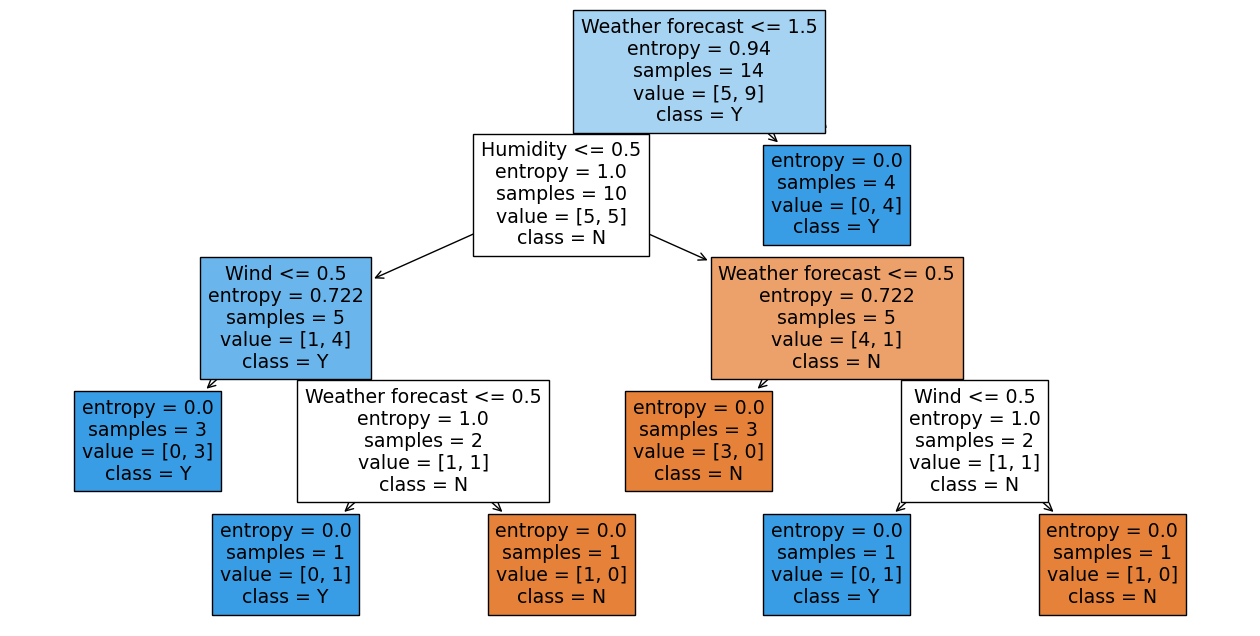

In [62]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# scikit-learn의 DecisionTreeClassifier를 엔트로피 기준으로 학습
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Weather forecast', 'Temperature', 'Humidity', 'Wind'], class_names=['N', 'Y'], filled=True)
plt.show()

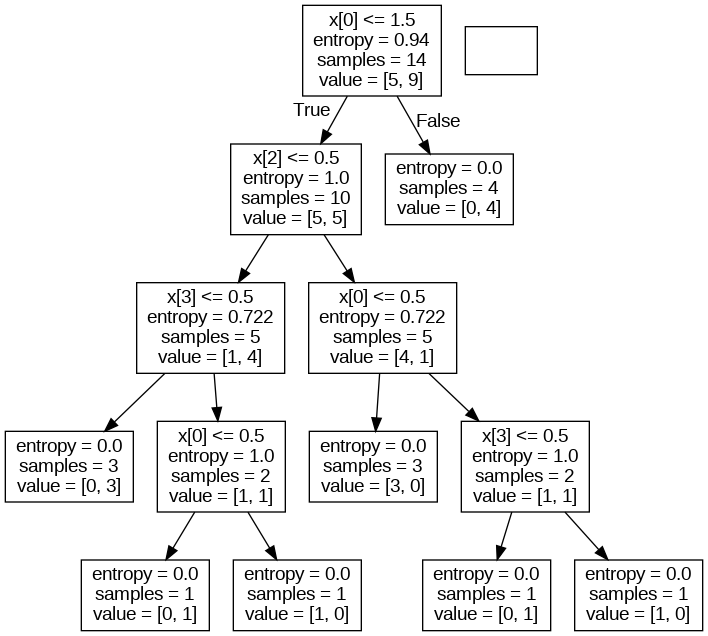

In [60]:
# Decision Tree for binary classifier
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

2번 :
 - scikit learn으로 실행해서 plotting
 - drug200.exe data 처리

 1. 라이브러리 불러오기 및 데이터 불러오기

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# CSV 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


2. 전처리

In [92]:
# 범주형 데이터 숫자 인코딩
df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Drug'] = df['Drug'].replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})

<ipython-input-92-04f763b5dc7f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
<ipython-input-92-04f763b5dc7f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
<ipython-input-92-04f763b5dc7f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

3. 훈련/테스트 데이터 분리

In [93]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 4. 결정 트리 모델 학습

In [94]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

5. 결정 트리 시각화

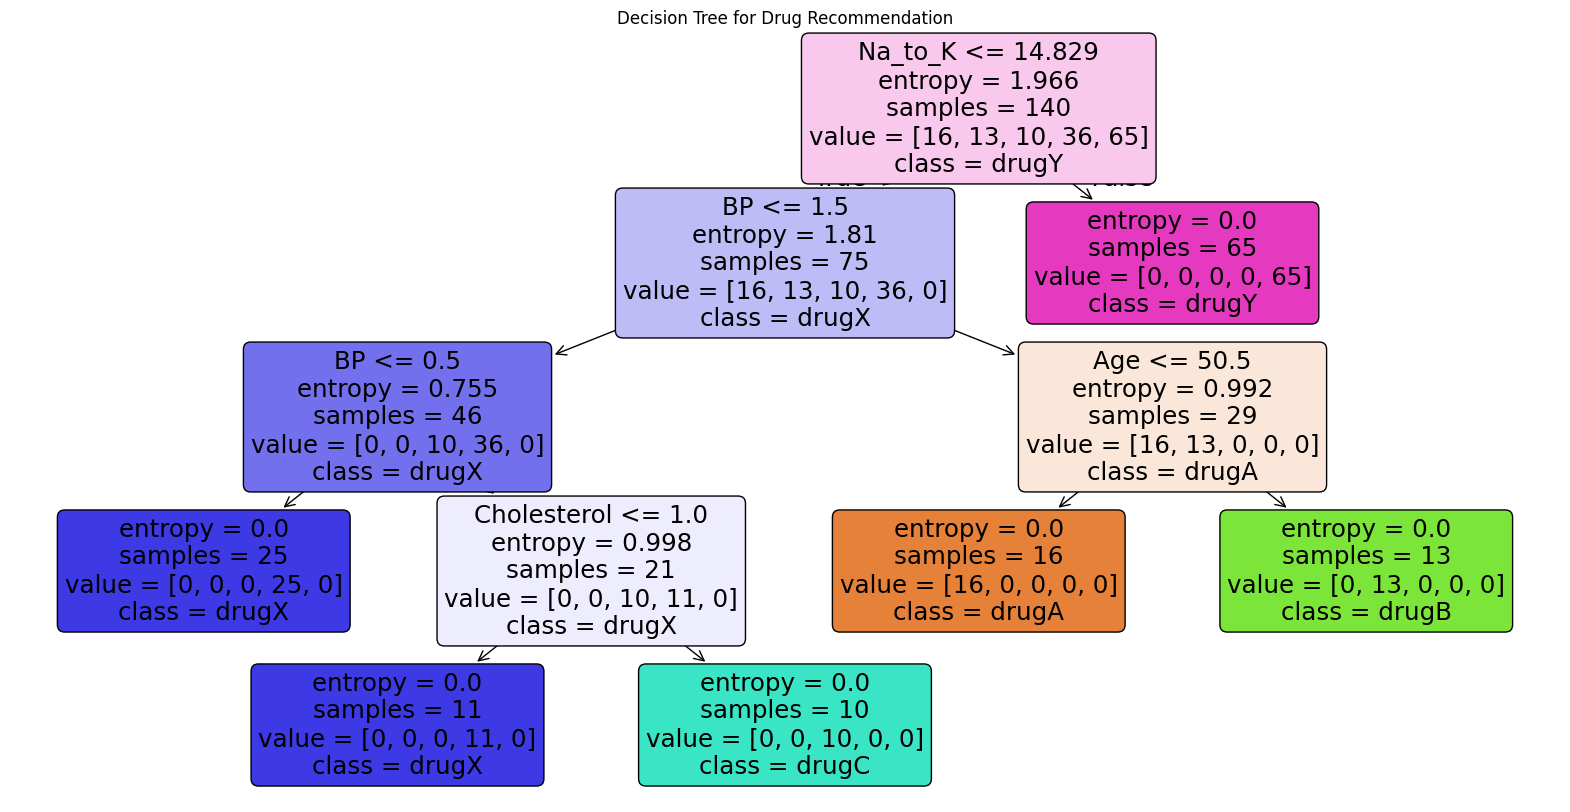

In [95]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
               filled=True,
               rounded=True)
plt.title("Decision Tree for Drug Recommendation")
plt.show()

6. 모델 정확도 평가

In [96]:
accuracy = clf.score(X_test, y_test)
print(f"테스트 데이터 정확도: {accuracy:.2f}")

테스트 데이터 정확도: 1.00
